In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data = model_data.dropna(subset=["PM2.5"])
model_data

X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002,random_state=42)

In [4]:
import optuna
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def objective(trial):
    X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
    y = model_data["PM2.5"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)

    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_float('C', 0.1, 100.0)
    epsilon = trial.suggest_float('epsilon', 0.01, 0.5)

    model = SVR(kernel=kernel, C=C, epsilon=epsilon)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    return r2

study = optuna.create_study(direction='maximize')

improvement_threshold = 0.001
stale_count = 0

best_r2 = -float('inf')

r2_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value > best_r2:
        best_r2 = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    r2_values.append(best_r2)

    if stale_count >= 11000 or best_r2 >= 1.0:
        break

best_params = study.best_params
best_r2 = study.best_value

print("Najlepsze parametry:", best_params)
print("Najlepszy R^2 Score:", best_r2)


[I 2023-10-22 18:11:27,212] A new study created in memory with name: no-name-3dcb33ac-2988-4289-bd9f-3390d1e0638d
[I 2023-10-22 18:11:28,073] Trial 0 finished with value: 0.6373402654574689 and parameters: {'kernel': 'poly', 'C': 2.582068221942846, 'epsilon': 0.09862247005694363}. Best is trial 0 with value: 0.6373402654574689.
[I 2023-10-22 18:11:33,507] Trial 1 finished with value: 0.5669046882714855 and parameters: {'kernel': 'linear', 'C': 3.252792243936249, 'epsilon': 0.4112337868322787}. Best is trial 0 with value: 0.6373402654574689.
[I 2023-10-22 18:11:34,995] Trial 2 finished with value: 0.8338640571588447 and parameters: {'kernel': 'poly', 'C': 92.3365382229923, 'epsilon': 0.16030944182744755}. Best is trial 2 with value: 0.8338640571588447.
[I 2023-10-22 18:11:36,438] Trial 3 finished with value: 0.8311935277542779 and parameters: {'kernel': 'poly', 'C': 79.65807013488467, 'epsilon': 0.294255614854972}. Best is trial 2 with value: 0.8338640571588447.
[I 2023-10-22 18:11:37,5

Średni błąd kwadratowy (MSE): 102.5713712088652
Procentowa zgodność: 83.72%


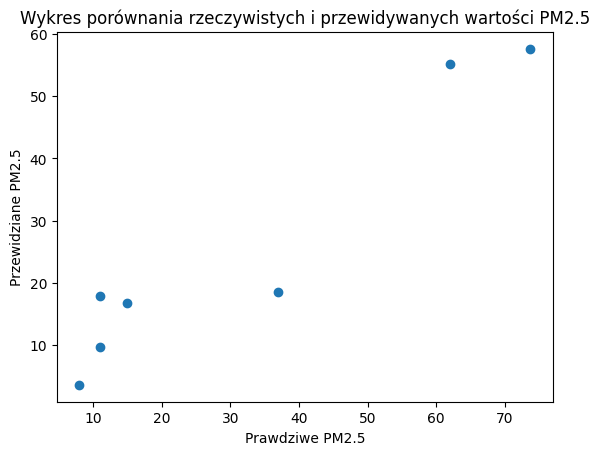

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
194,11.00,17.823038,-6.823038
2194,10.98,9.677411,1.302589
3276,73.73,57.587224,16.142776
199,15.00,16.725858,-1.725858
1091,8.00,3.593836,4.406164
80,37.00,18.580437,18.419563
2602,62.02,55.128946,6.891054


In [6]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


params =  {'kernel': 'poly', 'C': 99.98410792116512, 'epsilon': 0.4896597219611907}
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data["PM2.5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)


model = SVR(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

plt.scatter(y_test, y_pred)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results



